In [1]:
# Mount Google Drive if using Colab
try:
    from google.colab import drive
    drive.mount('/content/drive')
    USING_COLAB = True
except:
    USING_COLAB = False

Mounted at /content/drive


In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
# !pip install nlpaug

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 410.5/410.5 kB 26.9 MB/s eta 0:00:00


In [4]:
import torch
import pandas as pd
from concurrent.futures import ThreadPoolExecutor
import nlpaug.augmenter.word as naw
import math

In [5]:
if USING_COLAB:
    path_dataset = "/content/drive/My Drive/GTSI/Codigos_proyectos_carrera/data"
    sufix = "colab"
else:
    path_dataset = "./data"
    sufix = "local"

In [6]:
pd.set_option('display.max_columns', None)

In [7]:
df = pd.read_csv(path_dataset + '/projects.csv')

In [8]:
df.shape

(19422, 7)

In [9]:
df.head()

titulo  \
0  preparaci√≥n de nano celulosa y su utilizaci√≥n ...   
1  monitoreo no intrusivo de cargas el√©ctricas en...   
2  difusi√≥n del uso de herramientas tecnol√≥gicas ...   
3  variacion del tiempo de fraguado debido a mixt...   
4  tecnolog√≠as aplicadas y an√°lisis econ√≥mico en ...   

                                            FACULTAD                 CARRERA  \
0       Facultad de Ciencias Naturales y Matem√°ticas      Ingenier√≠a Qu√≠mica   
1       Facultad de Ciencias Naturales y Matem√°ticas  Logistica y Transporte   
2  Facultad de Arte, Dise√±o y Comunicaci√≥n Audiov...          Dise√±o Gr√°fico   
3    Facultad de Ingenier√≠a en Ciencias de la Tierra       Ingenier√≠a  Civil   
4       Facultad de Ciencias Sociales y Human√≠sticas                Econom√≠a   

                                        NOMBREPROYEC  counts URL  ESTADO  
0  Preparaci√≥n de nano celulosa y su utilizaci√≥n ...    72.0   0  Activa  
1  MONITOREO NO INTRUSIVO DE CARGAS EL√âCTRICAS EN...    71.0   0  Activa  
2  Difusi√≥n del uso de herramientas tecnol√≥gicas ...    62.0   0  Activa  
3  Variacion del tiempo de fraguado debido a mixt...    56.0   0  Activa  
4  Tecnolog√≠as aplicadas y an√°lisis econ√≥mico en ...    54.0   0  Activa

In [10]:
df["titulo"].nunique(), df["NOMBREPROYEC"].nunique(), df["FACULTAD"].nunique(), df["CARRERA"].nunique()

(18277, 18672, 10, 34)

In [11]:
df_titulo_count_all = df["titulo"].value_counts()
df_titulo_count = df_titulo_count_all[df_titulo_count_all > 1]
df_titulo_count

titulo
dise√±o de un equipo para la medici√≥n de la biodegradabilidad en pel√≠culas polim√©rica y no polim√©ricas                                                   6
dise√±o estudio caracterizaci√≥n y evaluaci√≥n de la factibilidad de uso de un envase innovador para la industria alimentaria en el mercado ecuatoriano    6
dise√±o y desarrollo de una formula para el recubrimiento de una fruta de exportaci√≥n no tradicional                                                     5
desarrollo de la cadena de producci√≥n de alimentos basados en prote√≠na de origen vegetal                                                                5
prototipo de control autom√°tico de calidad de comida usando im√°genes hiperespectrales                                                                   5
                                                                                                                                                       ..
an√°lisis de los riesgos y peligros de incendio en estaciones de transformaci√≥n de energ√≠a y centro de control de motores                                2
estudio de factibilidad para la comercializaci√≥n en la ciudad de guayaquil de un dispositivo de control de consumo de energ√≠a en hogares                2
dise√±o de reservorios para riego en el recinto francisco de orellana parroquia la am√©rica cant√≥n jipijapa                                               2
dise√±o de metodolog√≠a para medir maquinabilidad de piezas fabricadas por manufactura aditiva                                                            2
dise√±o e implementaci√≥n del modelo tarifario de transporte para una empresa de consumo masivo en guayaquil                                              2
Name: count, Length: 1018, dtype: int64

In [12]:
df[df["titulo"] == df_titulo_count.keys()[0]]

titulo  \
513    dise√±o de un equipo para la medici√≥n de la bio...   
541    dise√±o de un equipo para la medici√≥n de la bio...   
1973   dise√±o de un equipo para la medici√≥n de la bio...   
2469   dise√±o de un equipo para la medici√≥n de la bio...   
4013   dise√±o de un equipo para la medici√≥n de la bio...   
14458  dise√±o de un equipo para la medici√≥n de la bio...   

                                                FACULTAD  \
513    Facultad de Ingenier√≠a en Mec√°nica y Ciencias ...   
541    Facultad de Ingenier√≠a en Mec√°nica y Ciencias ...   
1973        Facultad de Ciencias Naturales y Matem√°ticas   
2469   Facultad de Ingenier√≠a en Electricidad y Compu...   
4013                     Facultad de Ciencias de la Vida   
14458  Facultad de Ingenier√≠a en Mec√°nica y Ciencias ...   

                            CARRERA  \
513                       Alimentos   
541                        Mec√°nica   
1973             Ingenier√≠a Qu√≠mica   
2469   Electr√≥nica y Automatizaci√≥n   
4013                       Biolog√≠a   
14458                      Mec√°nica   

                                            NOMBREPROYEC  counts URL  \
513    DISE√ëO DE UN EQUIPO PARA LA MEDICI√ìN DE LA BIO...    24.0   0   
541    Dise√±o de un equipo para la medici√≥n de la bio...    24.0   0   
1973   DISE√ëO DE UN EQUIPO PARA LA MEDICI√ìN DE LA BIO...    16.0   0   
2469   DISE√ëO DE UN EQUIPO PARA LA MEDICI√ìN DE LA BIO...    15.0   0   
4013   DISE√ëO DE UN EQUIPO PARA LA MEDICI√ìN DE LA BIO...    11.0   0   
14458  Dise√±o de un equipo para la medici√≥n de la bio...     2.0   0   

          ESTADO  
513       Activa  
541       Activa  
1973      Activa  
2469      Activa  
4013      Activa  
14458  No Activa

In [13]:
df_carrera_count_all = df["CARRERA"].value_counts()
value_counts = 10
df_carrera_count = df_carrera_count_all[df_carrera_count_all >= value_counts]
df_carrera_count_less = df_carrera_count_all[df_carrera_count_all < value_counts]
df_carrera_count_all

CARRERA
Administraci√≥n de Empresas                    1898
Econom√≠a                                      1578
Computaci√≥n                                   1421
Electricidad                                  1371
Auditor√≠a y Control de Gesti√≥n                1083
Ingenier√≠a  Civil                             1073
Ingenier√≠a Industrial                         1072
Telecomunicaciones                             993
Electr√≥nica y Automatizaci√≥n                   739
Dise√±o Gr√°fico                                 729
Turismo                                        721
Producci√≥n para Medios de Comunicaci√≥n         687
Alimentos                                      563
Estad√≠stica                                    561
Telem√°tica                                     528
Mec√°nica                                       506
Petr√≥leos                                      497
Ingenier√≠a Qu√≠mica                             468
Acuicultura                                    422
Nutrici√≥n y Diet√©tica                          360
Logistica y Transporte                         310
Biolog√≠a                                       297
Geolog√≠a                                       279
Ingenier√≠a Naval                               255
Ingenier√≠a Agr√≠cola y Biol√≥gica                247
Mecatr√≥nica                                    233
Oceanograf√≠a                                   193
Minas                                          161
Arqueolog√≠a                                     69
Dise√±o de Productos                             38
Materiales                                      25
Matem√°tica                                      25
Tecnolog√≠a Superior en Mecatr√≥nica              11
Tecnolog√≠a Superior en Logistica Portuaria       9
Name: count, dtype: int64

In [14]:
df_carrera_count_all.shape, df_carrera_count.shape, df_carrera_count_less.shape

((34,), (33,), (1,))

In [15]:
df_carrera_count_less

CARRERA
Tecnolog√≠a Superior en Logistica Portuaria    9
Name: count, dtype: int64

In [16]:
df_carrera_count

CARRERA
Administraci√≥n de Empresas                1898
Econom√≠a                                  1578
Computaci√≥n                               1421
Electricidad                              1371
Auditor√≠a y Control de Gesti√≥n            1083
Ingenier√≠a  Civil                         1073
Ingenier√≠a Industrial                     1072
Telecomunicaciones                         993
Electr√≥nica y Automatizaci√≥n               739
Dise√±o Gr√°fico                             729
Turismo                                    721
Producci√≥n para Medios de Comunicaci√≥n     687
Alimentos                                  563
Estad√≠stica                                561
Telem√°tica                                 528
Mec√°nica                                   506
Petr√≥leos                                  497
Ingenier√≠a Qu√≠mica                         468
Acuicultura                                422
Nutrici√≥n y Diet√©tica                      360
Logistica y Transporte                     310
Biolog√≠a                                   297
Geolog√≠a                                   279
Ingenier√≠a Naval                           255
Ingenier√≠a Agr√≠cola y Biol√≥gica            247
Mecatr√≥nica                                233
Oceanograf√≠a                               193
Minas                                      161
Arqueolog√≠a                                 69
Dise√±o de Productos                         38
Materiales                                  25
Matem√°tica                                  25
Tecnolog√≠a Superior en Mecatr√≥nica          11
Name: count, dtype: int64

In [17]:
df_new = df[df["CARRERA"].isin(df_carrera_count.index)]
df_new.shape

(19413, 7)

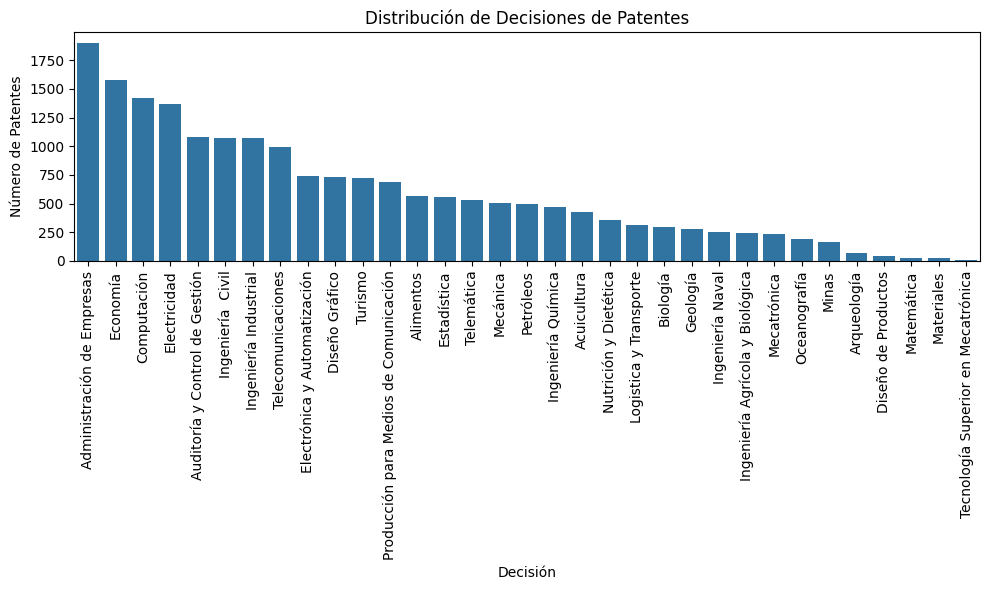

In [18]:
# diagrama de barras de la columna "decision"
plt.figure(figsize=(10, 6))
sns.countplot(data=df_new, x='CARRERA', order=df_new['CARRERA'].value_counts().index)
plt.title('Distribuci√≥n de Decisiones de Patentes')
plt.xlabel('Decisi√≥n')
plt.ylabel('N√∫mero de Patentes')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## DataAugmentation

In [ ]:
def balance_with_multi_gpu_parallel(df, text_col='titulo', label_col='CARRERA', gpu_ids=[0, 1], target_count=None, mode='balance'):
    """
    Balancea dataset usando m√∫ltiples GPUs con paralelizaci√≥n intra-clase
    
    Args:
        df: DataFrame a balancear
        text_col: Columna con el texto
        label_col: Columna con las etiquetas
        gpu_ids: Lista de IDs de GPU a usar
        target_count: N√∫mero objetivo de muestras por clase
        mode: 'balance' (igualar al m√°ximo) o 'add' (a√±adir target_count a cada clase)
    """
    # Verificar GPUs disponibles
    available_gpus = torch.cuda.device_count() if torch.cuda.is_available() else 0
    print(f"GPUs disponibles: {available_gpus}")

    if available_gpus == 0:
        print("‚ö†Ô∏è No hay GPUs disponibles, usando CPU")
        gpu_ids = ['cpu']
    elif available_gpus < len(gpu_ids):
        print(f"‚ö†Ô∏è Solo {available_gpus} GPUs disponibles, usando las primeras {available_gpus}")
        gpu_ids = gpu_ids[:available_gpus]

    # Crear augmenters para cada GPU
    augmenters = {}
    for gpu_id in gpu_ids:
        device = f'cuda:{gpu_id}' if gpu_id != 'cpu' else 'cpu'
        # Opci√≥n 1: Modelo espec√≠fico para espa√±ol (mejor rendimiento)
        augmenters[gpu_id] = naw.ContextualWordEmbsAug(
            model_path='dccuchile/bert-base-spanish-wwm-uncased',  # Modelo espa√±ol
            aug_p=0.12,  # Ajustar para textos en espa√±ol
            top_k=100,   # M√°s variedad en reemplazos
            device=device
        )
        print(f"‚úÖ Augmenter creado en {'GPU' if gpu_id != 'cpu' else 'CPU'} {gpu_id}")

    # An√°lisis de clases
    class_counts = df[label_col].value_counts()
    
    # Determinar target_count seg√∫n el modo
    if mode == 'balance':
        # Modo balance: igualar todas las clases al m√°ximo actual
        if target_count is None:
            target_count = class_counts.max()
            print(f"üîç Modo BALANCE: Igualando todas las clases al m√°ximo actual: {target_count:,}")
        else:
            print(f"üîç Modo BALANCE: Igualando todas las clases a: {target_count:,}")
    elif mode == 'add':
        # Modo add: a√±adir target_count a cada clase
        if target_count is None:
            target_count = 1000  # Valor por defecto
            print(f"üîç Modo ADD: A√±adiendo {target_count:,} muestras a cada clase")
        else:
            print(f"üîç Modo ADD: A√±adiendo {target_count:,} muestras a cada clase")

    print(f"\nDistribuci√≥n actual:")
    for class_label, count in class_counts.items():
        print(f"  {class_label}: {count:,}")
    
    if mode == 'balance':
        print(f"\nObjetivo: {target_count:,} muestras por clase (BALANCE)")
    else:
        print(f"\nObjetivo: A√±adir {target_count:,} muestras a cada clase (ADD)")

    def process_batch_on_gpu(args):
        """Procesa un lote de una clase en una GPU espec√≠fica"""
        class_label, batch_start, batch_size, class_texts, gpu_id, total_needed = args

        augmenter = augmenters[gpu_id]
        augmented_data = []

        batch_end = min(batch_start + batch_size, total_needed)
        actual_batch_size = batch_end - batch_start
        print("actual_batch_size", actual_batch_size, "batch_end", batch_end, "batch_start", batch_start)

        print(f"üöÄ {'GPU' if gpu_id != 'cpu' else 'CPU'} {gpu_id}: Procesando clase {class_label} "
              f"[{batch_start:,}-{batch_end:,}] ({actual_batch_size:,} muestras)")

            
        # Procesar en mini-batches
        mini_batch_size = 16
        for i in range(0, actual_batch_size, mini_batch_size):
            mini_end = min(i + mini_batch_size, actual_batch_size)
            print("desde", i, "hasta", mini_end, "mini_batch_size", mini_batch_size, "actual_batch_size", actual_batch_size)
            mini_texts = [class_texts[j % len(class_texts)] for j in range(i, mini_end)]
            print(f"  Procesando mini-batch {i // mini_batch_size + 1}, i {i}, mini_end {mini_end}, mini_texts {len(mini_texts)}")

            try:
                augmented_batch = augmenter.augment(mini_texts, 
                                                    n=math.ceil((batch_end - i) / len(class_texts)),
                                                    num_thread=1 if gpu_id == 'cpu' else 4)

                for j, aug_text in enumerate(augmented_batch):
                    # Mantener las columnas originales del dataframe
                    original_idx = (i + j) % len(class_texts)
                    original_row = df[df[label_col] == class_label].iloc[original_idx]

                    global_idx = batch_start + i + j
                    augmented_data.append({
                        'FACULTAD': original_row['FACULTAD'],
                        'NOMBREPROYEC': original_row['NOMBREPROYEC'],
                        text_col: aug_text,
                        label_col: class_label,
                        'gpu_used': gpu_id,
                        'batch_id': f"{class_label}_GPU{gpu_id}_{batch_start}-{batch_end}"
                    })

            except Exception as e:
                print(f"Error en {'GPU' if gpu_id != 'cpu' else 'CPU'} {gpu_id}: {e}")
                # Fallback
                for j, text in enumerate(mini_texts):
                    original_idx = (i + j) % len(class_texts)
                    original_row = df[df[label_col] == class_label].iloc[original_idx]

                    global_idx = batch_start + i + j
                    augmented_data.append({
                        'FACULTAD': original_row['FACULTAD'],
                        'NOMBREPROYEC': original_row['NOMBREPROYEC'],
                        text_col: text,
                        label_col: class_label,
                        'gpu_used': gpu_id,
                        'batch_id': f"{class_label}_GPU{gpu_id}_{batch_start}-{batch_end}"
                    })
            finally:
                print(f"‚úÖ {'GPU' if gpu_id != 'cpu' else 'CPU'} {gpu_id}: Completado lote {class_label} batch {i // batch_size + 1} ({len(augmented_data):,} muestras), i {i})")

        print(f"‚úÖ {'GPU' if gpu_id != 'cpu' else 'CPU'} {gpu_id}: Completado lote {class_label} "
              f"[{batch_start:,}-{batch_end:,}] - {len(augmented_data)} muestras generadas")
        return augmented_data

    # Preparar trabajos dividiendo cada clase entre GPUs
    all_jobs = []

    for class_label, current_count in class_counts.items():
        if mode == 'balance':
            # Modo balance: calcular cu√°ntas faltan para llegar al target
            needed = target_count - current_count
        else:  # mode == 'add'
            # Modo add: a√±adir target_count a la cantidad actual
            needed = target_count
        
        if needed <= 0 and mode == 'balance':
            print(f"Clase {class_label} ya tiene suficientes muestras ({current_count:,})")
            continue
        elif needed <= 0 and mode == 'add':
            print(f"‚ö†Ô∏è target_count debe ser > 0 para modo ADD. Saltando clase {class_label}")
            continue

        print(f"Clase {class_label}: Actual={current_count:,}, A√±adir={needed:,}, Objetivo={target_count:,}")
        
        class_texts = df[df[label_col] == class_label][text_col].tolist()
        class_texts.reverse()

        num_batches = 8  # O el n√∫mero de hilos que quieras
        batch_size = math.ceil(needed / num_batches)
        for i in range(num_batches):
            batch_start = i * batch_size
            if batch_start >= needed:
                break
            this_batch_size = min(batch_size, needed - batch_start)
            print(f"Clase {class_label}: Lote {i + 1}/{num_batches} - "
                  f"Desde {batch_start} hasta {batch_start + this_batch_size} ({this_batch_size} muestras) - tama√±o de class_texts los {label_col} = {len(class_texts)}")
            all_jobs.append((class_label, batch_start, this_batch_size, class_texts, gpu_ids[0], needed))


    if not all_jobs:
        if mode == 'balance':
            print("‚úÖ El dataset ya est√° balanceado")
        else:
            print("‚úÖ No hay trabajos que procesar")
        return df

    print(f"\nüî• Total de trabajos paralelos: {len(all_jobs)}")

    # Ejecutar todos los trabajos en paralelo
    all_augmented_data = []
    max_workers = min(len(all_jobs), len(gpu_ids) * 2)  # Limitar workers
    # max_workers = len(all_jobs)
    print("max_workers", max_workers, len(all_jobs), len(gpu_ids))

    with ThreadPoolExecutor(max_workers=max_workers) as executor:
        results = executor.map(process_batch_on_gpu, all_jobs)

        for result in results:
            all_augmented_data.extend(result)

    # Combinar resultados
    if all_augmented_data:
        augmented_df = pd.DataFrame(all_augmented_data)
        balanced_df = pd.concat([df, augmented_df], ignore_index=True)
    else:
        balanced_df = df.copy()

    print(f"\nüéâ Completado!")
    print(f"Total original: {len(df):,}")
    print(f"Total final: {len(balanced_df):,}")
    print(f"Muestras a√±adidas: {len(all_augmented_data):,}")

    # Mostrar distribuci√≥n final
    final_counts = balanced_df[label_col].value_counts()
    print(f"\nDistribuci√≥n final:")
    for class_label, count in final_counts.items():
        original_count = class_counts[class_label]
        added = count - original_count
        print(f"  {class_label}: {count:,} (original: {original_count:,}, a√±adido: {added:,})")

    # Mostrar uso detallado por GPU
    if len(all_augmented_data) > 0:
        augmented_df_temp = pd.DataFrame(all_augmented_data)

        print("\nüìä Uso detallado por GPU:")
        gpu_usage = augmented_df_temp.groupby(['gpu_used', label_col]).size().reset_index(name='count')

        for gpu_id in gpu_ids:
            gpu_data = gpu_usage[gpu_usage['gpu_used'] == gpu_id]
            total_gpu = gpu_data['count'].sum()
            print(f"\n  {'GPU' if gpu_id != 'cpu' else 'CPU'} {gpu_id}: {total_gpu:,} muestras totales")

            for _, row in gpu_data.iterrows():
                print(f"    - {row[label_col]}: {row['count']:,}")

    return balanced_df

In [ ]:
# def balance_with_multi_gpu_parallel(df, text_col='titulo', label_col='CARRERA', gpu_ids=[0, 1], target_count=None):
#     """Balancea dataset usando m√∫ltiples GPUs con paralelizaci√≥n intra-clase"""
#     # Verificar GPUs disponibles
#     available_gpus = torch.cuda.device_count() if torch.cuda.is_available() else 0
#     print(f"GPUs disponibles: {available_gpus}")

#     if available_gpus == 0:
#         print("‚ö†Ô∏è No hay GPUs disponibles, usando CPU")
#         gpu_ids = ['cpu']
#     elif available_gpus < len(gpu_ids):
#         print(f"‚ö†Ô∏è Solo {available_gpus} GPUs disponibles, usando las primeras {available_gpus}")
#         gpu_ids = gpu_ids[:available_gpus]

#     # Crear augmenters para cada GPU
#     augmenters = {}
#     for gpu_id in gpu_ids:
#         device = f'cuda:{gpu_id}' if gpu_id != 'cpu' else 'cpu'
#         augmenters[gpu_id] = naw.ContextualWordEmbsAug(
#             model_path='bert-base-multilingual-uncased',
#             aug_p=0.12,  # Ajustar para textos en espa√±ol
#             top_k=100,   # M√°s variedad en reemplazos
#             device=device
#         )
#         print(f"‚úÖ Augmenter creado en {'GPU' if gpu_id != 'cpu' else 'CPU'} {gpu_id}")

#     # An√°lisis de clases
#     class_counts = df[label_col].value_counts()
#     # --------------------------------------------------
#     if target_count is None:
#         target_count = class_counts.max()
#         print(f"üîç No se especific√≥ target_count, ahora se usar√† el m√°ximo de clases: {target_count:,}")
#     # --------------------------------------------------


#     print(f"\nDistribuci√≥n actual:")
#     for class_label, count in class_counts.items():
#         print(f"  {class_label}: {count:,}")
#     print(f"\nObjetivo: {target_count:,} muestras por clase")

#     def process_batch_on_gpu(args):
#         """Procesa un lote de una clase en una GPU espec√≠fica"""
#         class_label, batch_start, batch_size, class_texts, gpu_id, total_needed = args

#         augmenter = augmenters[gpu_id]
#         augmented_data = []

#         batch_end = min(batch_start + batch_size, total_needed)
#         actual_batch_size = batch_end - batch_start
#         print("actual_batch_size", actual_batch_size, "batch_end", batch_end, "batch_start", batch_start)

#         print(f"üöÄ {'GPU' if gpu_id != 'cpu' else 'CPU'} {gpu_id}: Procesando clase {class_label} "
#               f"[{batch_start:,}-{batch_end:,}] ({actual_batch_size:,} muestras)")


#         # Procesar en mini-batches
#         mini_batch_size = 16
#         for i in range(0, actual_batch_size, mini_batch_size):
#             mini_end = min(i + mini_batch_size, actual_batch_size)
#             print("desde", i, "hasta", mini_end, "mini_batch_size", mini_batch_size, "actual_batch_size", actual_batch_size)
#             mini_texts = [class_texts[j % len(class_texts)] for j in range(i, mini_end)]
#             print(f"  Procesando mini-batch {i // mini_batch_size + 1}, i {i}, mini_end {mini_end}, mini_texts {len(mini_texts)}")

#             try:
#                 augmented_batch = augmenter.augment(mini_texts,
#                                                     n=math.ceil((batch_end - i) / len(class_texts)),
#                                                     num_thread=1 if gpu_id == 'cpu' else 4)

#                 for j, aug_text in enumerate(augmented_batch):
#                     # Mantener las columnas originales del dataframe
#                     original_idx = (i + j) % len(class_texts)
#                     original_row = df[df[label_col] == class_label].iloc[original_idx]

#                     global_idx = batch_start + i + j
#                     augmented_data.append({
#                         'FACULTAD': original_row['FACULTAD'],
#                         'NOMBREPROYEC': original_row['NOMBREPROYEC'],
#                         text_col: aug_text,
#                         label_col: class_label,
#                         'gpu_used': gpu_id,
#                         'batch_id': f"{class_label}_GPU{gpu_id}_{batch_start}-{batch_end}"
#                     })

#             except Exception as e:
#                 print(f"Error en {'GPU' if gpu_id != 'cpu' else 'CPU'} {gpu_id}: {e}")
#                 # Fallback
#                 for j, text in enumerate(mini_texts):
#                     original_idx = (i + j) % len(class_texts)
#                     original_row = df[df[label_col] == class_label].iloc[original_idx]

#                     global_idx = batch_start + i + j
#                     augmented_data.append({
#                         'FACULTAD': original_row['FACULTAD'],
#                         'NOMBREPROYEC': original_row['NOMBREPROYEC'],
#                         text_col: text,
#                         label_col: class_label,
#                         'gpu_used': gpu_id,
#                         'batch_id': f"{class_label}_GPU{gpu_id}_{batch_start}-{batch_end}"
#                     })
#             finally:
#                 print(f"‚úÖ {'GPU' if gpu_id != 'cpu' else 'CPU'} {gpu_id}: Completado lote {class_label} batch {i // batch_size + 1} ({len(augmented_data):,} muestras), i {i})")

#         print(f"‚úÖ {'GPU' if gpu_id != 'cpu' else 'CPU'} {gpu_id}: Completado lote {class_label} "
#               f"[{batch_start:,}-{batch_end:,}] - {len(augmented_data)} muestras generadas")
#         return augmented_data

#     # Preparar trabajos dividiendo cada clase entre GPUs
#     all_jobs = []

#     for class_label, current_count in class_counts.items():
#         needed = target_count - current_count

#         if needed <= 0:
#             print(f"Clase {class_label} ya tiene suficientes muestras ({current_count:,})")
#             continue

#         print("needed", needed, "needed menos", 5000, "target_count", target_count, "current_count", current_count)
#         # needed = 5000

#         class_texts = df[df[label_col] == class_label][text_col].tolist()
#         class_texts.reverse()

#         num_batches = 8  # O el n√∫mero de hilos que quieras
#         batch_size = math.ceil(needed / num_batches)
#         for i in range(num_batches):
#             batch_start = i * batch_size
#             if batch_start >= needed:
#                 break
#             this_batch_size = min(batch_size, needed - batch_start)
#             print(f"Clase {class_label}: Lote {i + 1}/{num_batches} - "
#                   f"Desde {batch_start} hasta {batch_start + this_batch_size} ({this_batch_size} muestras) - tama√±o de class_texts los {label_col} = {len(class_texts)}")
#             all_jobs.append((class_label, batch_start, this_batch_size, class_texts, gpu_ids[0], needed))


#     if not all_jobs:
#         print("‚úÖ El dataset ya est√° balanceado")
#         return df

#     print(f"\nüî• Total de trabajos paralelos: {len(all_jobs)}")

#     # Ejecutar todos los trabajos en paralelo
#     all_augmented_data = []
#     max_workers = min(len(all_jobs), len(gpu_ids) * 2)  # Limitar workers
#     # max_workers = len(all_jobs)
#     print("max_workers", max_workers, len(all_jobs), len(gpu_ids))

#     with ThreadPoolExecutor(max_workers=max_workers) as executor:
#         results = executor.map(process_batch_on_gpu, all_jobs)

#         for result in results:
#             all_augmented_data.extend(result)

#     # Combinar resultados
#     if all_augmented_data:
#         augmented_df = pd.DataFrame(all_augmented_data)
#         balanced_df = pd.concat([df, augmented_df], ignore_index=True)
#     else:
#         balanced_df = df.copy()

#     print(f"\nüéâ Completado!")
#     print(f"Total original: {len(df):,}")
#     print(f"Total final: {len(balanced_df):,}")
#     print(f"Muestras a√±adidas: {len(all_augmented_data):,}")

#     # Mostrar distribuci√≥n final
#     final_counts = balanced_df[label_col].value_counts()
#     print(f"\nDistribuci√≥n final:")
#     for class_label, count in final_counts.items():
#         print(f"  {class_label}: {count:,}")

#     # Mostrar uso detallado por GPU
#     if len(all_augmented_data) > 0:
#         augmented_df_temp = pd.DataFrame(all_augmented_data)

#         print("\nüìä Uso detallado por GPU:")
#         gpu_usage = augmented_df_temp.groupby(['gpu_used', label_col]).size().reset_index(name='count')

#         for gpu_id in gpu_ids:
#             gpu_data = gpu_usage[gpu_usage['gpu_used'] == gpu_id]
#             total_gpu = gpu_data['count'].sum()
#             print(f"\n  {'GPU' if gpu_id != 'cpu' else 'CPU'} {gpu_id}: {total_gpu:,} muestras totales")

#             for _, row in gpu_data.iterrows():
#                 print(f"    - {row[label_col]}: {row['count']:,}")

#     return balanced_df

In [20]:
balanced_df = balance_with_multi_gpu_parallel(df, gpu_ids=[0], target_count=5000) # 39 min

GPUs disponibles: 1


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.72M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/672M [00:00<?, ?B/s]

‚úÖ Augmenter creado en GPU 0

Distribuci√≥n actual:
  Administraci√≥n de Empresas: 1,898
  Econom√≠a: 1,578
  Computaci√≥n: 1,421
  Electricidad: 1,371
  Auditor√≠a y Control de Gesti√≥n: 1,083
  Ingenier√≠a  Civil: 1,073
  Ingenier√≠a Industrial: 1,072
  Telecomunicaciones: 993
  Electr√≥nica y Automatizaci√≥n: 739
  Dise√±o Gr√°fico: 729
  Turismo: 721
  Producci√≥n para Medios de Comunicaci√≥n: 687
  Alimentos: 563
  Estad√≠stica: 561
  Telem√°tica: 528
  Mec√°nica: 506
  Petr√≥leos: 497
  Ingenier√≠a Qu√≠mica: 468
  Acuicultura: 422
  Nutrici√≥n y Diet√©tica: 360
  Logistica y Transporte: 310
  Biolog√≠a: 297
  Geolog√≠a: 279
  Ingenier√≠a Naval: 255
  Ingenier√≠a Agr√≠cola y Biol√≥gica: 247
  Mecatr√≥nica: 233
  Oceanograf√≠a: 193
  Minas: 161
  Arqueolog√≠a: 69
  Dise√±o de Productos: 38
  Materiales: 25
  Matem√°tica: 25
  Tecnolog√≠a Superior en Mecatr√≥nica: 11
  Tecnolog√≠a Superior en Logistica Portuaria: 9

Objetivo: 5,000 muestras por clase
needed 3102 needed menos 5000 t

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:1750: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


Se truncaron las √∫ltimas l√≠neas 5000 del resultado de transmisi√≥n.
‚úÖ GPU 0: Completado lote Arqueolog√≠a batch 1 (304 muestras), i 288)
desde 304 hasta 320 mini_batch_size 16 actual_batch_size 612
  Procesando mini-batch 20, i 304, mini_end 320, mini_texts 16
‚úÖ GPU 0: Completado lote Arqueolog√≠a batch 1 (320 muestras), i 304)
desde 320 hasta 336 mini_batch_size 16 actual_batch_size 617
  Procesando mini-batch 21, i 320, mini_end 336, mini_texts 16
‚úÖ GPU 0: Completado lote Arqueolog√≠a batch 1 (320 muestras), i 304)
desde 320 hasta 336 mini_batch_size 16 actual_batch_size 612
  Procesando mini-batch 21, i 320, mini_end 336, mini_texts 16
‚úÖ GPU 0: Completado lote Arqueolog√≠a batch 1 (336 muestras), i 320)
desde 336 hasta 352 mini_batch_size 16 actual_batch_size 617
  Procesando mini-batch 22, i 336, mini_end 352, mini_texts 16
‚úÖ GPU 0: Completado lote Arqueolog√≠a batch 1 (336 muestras), i 320)
desde 336 hasta 352 mini_batch_size 16 actual_batch_size 612
  Procesando mini-

In [21]:
balanced_df.to_csv(path_dataset + "/projects_augmented_" + sufix + ".csv", index=False)